In [3]:
import json
import matplotlib.pyplot as plt
import matplotlib


# Load from files and pre-process data

In [24]:
with open('saved-results/mlp-glob-accuracies.json', 'r') as f:
    glob_accuracies = json.load(f)


glob_accuracies = get_average(glob_accuracies, accuracies=True)

with open('saved-results/mlp-glob-pgd-success.json', 'r') as f:
    glob_pgd_success = json.load(f)
glob_pgd_success = get_average(glob_pgd_success)

    
with open('saved-results/mlp-loc-accuracies.json', 'r') as f:
    loc_accuracies = json.load(f)
loc_accuracies = get_average(loc_accuracies, accuracies=True)

with open('saved-results/mlp-loc-pgd-success.json', 'r') as f:
    loc_pgd_success = json.load(f)
loc_pgd_success = get_average(loc_pgd_success)
    
    

### Smthn wrong here with the results
with open('saved-results/cnn-accuracies-glob-prunning.json', 'r') as f:
    cnn_glob_accuracies = json.load(f)
cnn_glob_accuracies = get_average(cnn_glob_accuracies, accuracies=True)

with open('saved-results/cnn-pgd-success-glob-prunning.json', 'r') as f:
    cnn_glob_pgd_success = json.load(f)
cnn_glob_pgd_success = get_average(cnn_glob_pgd_success)

compression_rates = [1, 2, 4, 8, 16, 32, 64]

# Plot

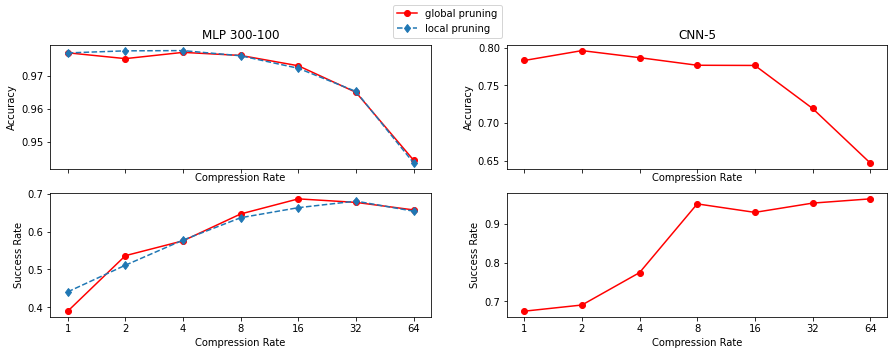

In [25]:

fig, (ax) = plt.subplots(2,2,figsize=(15,5), sharex=True)
matplotlib.rcParams['xtick.minor.size'] = 0
matplotlib.rcParams['xtick.minor.width'] = 0

ax[0,0].plot(compression_rates, glob_accuracies,'ro-')
ax[0,0].plot(compression_rates, loc_accuracies, 'd--')
ax[0,0].set(title='MLP 300-100',ylabel='Accuracy', xlabel='Compression Rate')


l0, = ax[1,0].plot(compression_rates, glob_pgd_success, 'ro-', label='global pruning')
l1, = ax[1,0].plot(compression_rates, loc_pgd_success,'d--',label='local pruning')
ax[1,0].set(ylabel='Success Rate', xlabel='Compression Rate')

ax[0,1].plot(compression_rates, cnn_glob_accuracies,'ro-')
ax[0,1].set(title='CNN-5',ylabel='Accuracy', xlabel='Compression Rate')


ax[1,1].plot(compression_rates, cnn_glob_pgd_success, 'ro-')
ax[1,1].set(ylabel='Success Rate', xlabel='Compression Rate')


# format xscale
ax[1,0].set_xscale('log')
ax[1,0].set_xticks(compression_rates)

ax[1,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

handles, labels = ax[1,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.show()

eps = 25/255

# Helper Functions

In [23]:
def get_average(all_values, accuracies=False):
    value_per_pruning_rate=[]
    for i in range(len(all_values)):
        for j in range(len(all_values[i])):
            
            try:
                if accuracies == False:
                    value_per_pruning_rate[j].append(all_values[i][j])
                if accuracies == True:
                    value_per_pruning_rate[j].append(all_values[i][j][1])
            except:
                value_per_pruning_rate.append([])
                if accuracies == False:
                    value_per_pruning_rate[j].append(all_values[i][j])
                if accuracies == True:
                    value_per_pruning_rate[j].append(all_values[i][j][1])
                
    avg_value_per_pruning_rate = [sum(x)/len(x) for x in value_per_pruning_rate]
    
    return avg_value_per_pruning_rate
